In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [2]:
datax = np.load(join('data', 'MNIST.npy'))
datay = np.load(join('data', 'Label.npy'))
datax_reshape = datax.reshape([datax.shape[0] , datax.shape[1]*datax.shape[2]])
datax_reshape_norm = datax_reshape/255
#print('최대 : {}, 최소 : {}'.format(np.max(datax_reshape_norm), np.min(datax_reshape_norm)))
datay_onehot = to_categorical(datay)
print(datay[0:10])
print(datay_onehot[0:10,:])
# Train, Test Data Split
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax_reshape_norm, datay_onehot, test_size = 0.3, random_state =111)

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [3]:
input_shape = (datax_reshape_norm.shape[1], )

visible = layers.Input(shape=input_shape)
hidden1 = layers.Dense(300,activation = 'relu')(visible)
hidden2 = layers.Dense(700,activation = 'relu')(hidden1)
hidden3 = layers.Dense(1000,activation = 'relu')(hidden2)
hidden4 = layers.Dense(1000,activation = 'relu')(hidden3)
hidden5 = layers.Dense(700,activation = 'relu')(hidden4)
hidden6 = layers.Dense(300,activation = 'relu')(hidden5)

output =  layers.Dense(10,activation = 'softmax')(hidden6)

mlp_function = models.Model(visible,output)
mlp_function.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 700)               210700    
                                                                 
 dense_2 (Dense)             (None, 1000)              701000    
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_4 (Dense)             (None, 700)               700700    
                                                                 
 dense_5 (Dense)             (None, 300)               210300

In [4]:
mlp_function.compile(optimizer='RMsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = mlp_function.fit(trnx, trny, validation_data = [tstx,tsty], batch_size=50, epochs=100)

Epoch 1/100
840/840 [==============================] - 34s 40ms/step - loss: 0.3766 - accuracy: 0.8960 - val_loss: 0.1982 - val_accuracy: 0.9529
Epoch 2/100
840/840 [==============================] - 33s 40ms/step - loss: 0.1969 - accuracy: 0.9553 - val_loss: 0.2202 - val_accuracy: 0.9598
Epoch 3/100
840/840 [==============================] - 33s 40ms/step - loss: 0.1674 - accuracy: 0.9645 - val_loss: 0.2226 - val_accuracy: 0.9599
Epoch 4/100
840/840 [==============================] - 33s 40ms/step - loss: 0.1434 - accuracy: 0.9685 - val_loss: 0.2497 - val_accuracy: 0.9659
Epoch 5/100
840/840 [==============================] - 33s 39ms/step - loss: 0.1391 - accuracy: 0.9720 - val_loss: 0.2139 - val_accuracy: 0.9704
Epoch 6/100
840/840 [==============================] - 33s 40ms/step - loss: 0.1375 - accuracy: 0.9744 - val_loss: 0.2308 - val_accuracy: 0.9711
Epoch 7/100
840/840 [==============================] - 33s 40ms/step - loss: 0.1277 - accuracy: 0.9765 - val_loss: 0.3651 - val_ac

840/840 [==============================] - 35s 41ms/step - loss: 3.6664 - accuracy: 0.7993 - val_loss: 12.8202 - val_accuracy: 0.9169
Epoch 58/100
840/840 [==============================] - 35s 41ms/step - loss: 1.4895 - accuracy: 0.7975 - val_loss: 7.1430 - val_accuracy: 0.7083
Epoch 59/100
840/840 [==============================] - 35s 42ms/step - loss: 2.6740 - accuracy: 0.7844 - val_loss: 8.1466 - val_accuracy: 0.7654
Epoch 60/100
840/840 [==============================] - 35s 42ms/step - loss: 2.6335 - accuracy: 0.6717 - val_loss: 7.9899 - val_accuracy: 0.7116
Epoch 61/100
840/840 [==============================] - 33s 39ms/step - loss: 2.7915 - accuracy: 0.6338 - val_loss: 11.1642 - val_accuracy: 0.7369
Epoch 62/100
840/840 [==============================] - 32s 38ms/step - loss: 1.9684 - accuracy: 0.7596 - val_loss: 5.1847 - val_accuracy: 0.7529
Epoch 63/100
840/840 [==============================] - 32s 38ms/step - loss: 4.8658 - accuracy: 0.8012 - val_loss: 9.9807 - val_accura

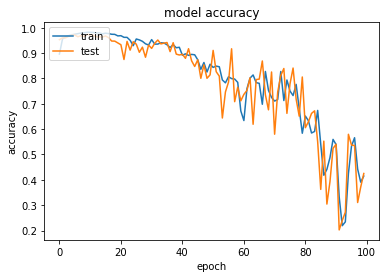

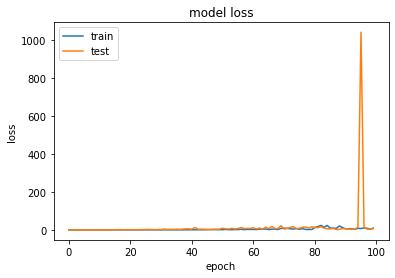

0.42500001192092896
0.973111093044281


In [5]:
# 학습과정 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Train data / Test Data Loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show() 
print(history.history['val_accuracy'][-1])
print(np.max(history.history['val_accuracy']))